## TFIDF

In [1]:
# Importando bibliotecas e funções
from libs import *
from utils import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\domaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


O TF-IDF é uma técnica que mede a importância das palavras em um texto, considerando com que frequência elas aparecem no documento (TF) e quão raras elas são em um conjunto de documentos (IDF). Isso ajuda a destacar palavras-chave e é útil para classificação e busca de documentos.

Em resumo, a diferença em relação ao saco de palavras, é que aqui todo o conjunto de documentos (textos) é considerado.

In [2]:
# Exemplo de texto
sample_text = ["Exemplo",
               "Palavra exemplo",
               "Exemplo de palavra (palavra)"]

# Criando uma instância do TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100)  

# Ajustando e transformando o texto
text_transformed = tfidf_vectorizer.fit_transform(sample_text)

# Convertendo a matriz esparsa em uma matriz densa para visualizar
text_transformed_dense = text_transformed.toarray()

# Mostrando os textos exemplo
print("\nExemplos de texto:")
print(sample_text)

# Visualizando palavras-chave
feature_names = tfidf_vectorizer.get_feature_names_out()
print("\nPalavras-chave:")
print(feature_names)

# Exibindo os resultados
print("\nMatriz: 'de', 'exemplo', 'palavra'")
print(text_transformed_dense)


Exemplos de texto:
['Exemplo', 'Palavra exemplo', 'Exemplo de palavra (palavra)']

Palavras-chave:
['de' 'exemplo' 'palavra']

Matriz: 'de', 'exemplo', 'palavra'
[[0.         1.         0.        ]
 [0.         0.61335554 0.78980693]
 [0.52253528 0.30861775 0.7948031 ]]


1. Carregando base de dados em um DataFrame do Pandas.

In [3]:
# Definindo dataframe preprocessado antes dos pipelines
df_tfidf = pd.read_csv('data/data3.csv')

In [4]:
# Amostra de 10%
#df_tfidf = df_tfidf.sample(frac=0.1, random_state=42) 

In [5]:
# Dimensões
df_tfidf.shape

(36642, 18)

In [6]:
# Definindo colunas numéricas, categóricas e textuais
numeric_features = ['year', 'video_count', 'view_count_x', 'subscriber_count', 
                    'aux_status', 'comment_count_y','dislike_count', 'view_count_y',
                        'like_count', 'video_duration', 'published_at']

categorical_features = ['channel_id','category', 'gender']

textual_features = ['video_title', 'video_desc']

In [7]:
# Substituindo valores nulos por uma string vazia
df_tfidf[textual_features] = df_tfidf[textual_features].fillna('')

2. Dividindo os dados em treino e teste, de maneira a evitar vazamento de dados (data leakage).

In [8]:
# Separando features (X) e os rótulos (y)
#X = df_tfidf[textual_features + categorical_features]
X = df_tfidf[textual_features]
y = df_tfidf['popularity']

# Dividindo os dados em treino e teste
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, y, test_size=0.3, random_state=42)

3. Aplicando `OneHotEncoder` nas colunas categóricas e transformando matriz.

In [11]:
"""
# Aplicando OneHotEncoder nas colunas categóricas com handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_tfidf_categorical = encoder.fit_transform(X_train_tfidf[categorical_features])
X_test_tfidf_categorical = encoder.transform(X_test_tfidf[categorical_features])

# 3 features categóricas representadas em matriz esparsa
print(X_train_tfidf_categorical[0])

# 3 features categóricas representadas em matriz densa
print(X_train_tfidf_categorical.toarray()[0])

# Transformando as features categóricas em matriz densa (array) para combinar com outras features no futuro
X_train_tfidf_categorical = X_train_tfidf_categorical.toarray()
X_test_tfidf_categorical = X_test_tfidf_categorical.toarray()
"""

"\n# Aplicando OneHotEncoder nas colunas categóricas com handle_unknown='ignore'\nencoder = OneHotEncoder(handle_unknown='ignore')\n\nX_train_tfidf_categorical = encoder.fit_transform(X_train_tfidf[categorical_features])\nX_test_tfidf_categorical = encoder.transform(X_test_tfidf[categorical_features])\n\n# 3 features categóricas representadas em matriz esparsa\nprint(X_train_tfidf_categorical[0])\n\n# 3 features categóricas representadas em matriz densa\nprint(X_train_tfidf_categorical.toarray()[0])\n\n# Transformando as features categóricas em matriz densa (array) para combinar com outras features no futuro\nX_train_tfidf_categorical = X_train_tfidf_categorical.toarray()\nX_test_tfidf_categorical = X_test_tfidf_categorical.toarray()\n"

4. Iniciando `TfidfVectorizer()` para a criação de representações TFIDF.

In [12]:
# Criando uma instância do TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100) 

In [13]:
# Definindo valores dos títulos de treino e de teste
tfidf_title_train = X_train_tfidf['video_title'].values
tfidf_title_test = X_test_tfidf['video_title'].values

In [14]:
# Exemplo de título separado para treino
tfidf_title_train[0]

'galaxy a20 v moto g8 play falta memória põe tudo perder'

In [15]:
# Definindo valores das descrições de treino e de teste
tfidf_desc_train = X_train_tfidf['video_desc'].values
tfidf_desc_test = X_test_tfidf['video_desc'].values

In [16]:
# Exemplo de descrição separado para treino
tfidf_desc_train[0]

'inscrevase vídeos ofertas moto g8 play'

5. Transformando os títulos e descrições dos conjuntos de treino e teste usando o `TfidfVectorizer()` 

In [17]:
# Ajustando e transformando os titulos
X_train_tfidf_title = tfidf_vectorizer.fit_transform(tfidf_title_train)
X_test_tfidf_title = tfidf_vectorizer.transform(tfidf_title_test)

In [18]:
# Convertendo a matriz esparsa em uma matriz densa para visualizar
X_train_tfidf_title = X_train_tfidf_title.toarray()
X_test_tfidf_title = X_test_tfidf_title.toarray()

In [19]:
print(X_train_tfidf_title[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.54700327 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.62452648 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.55745322 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [20]:
# Ajustando e transformando as descrições
X_train_tfidf_desc = tfidf_vectorizer.fit_transform(tfidf_desc_train)
X_test_tfidf_desc = tfidf_vectorizer.transform(tfidf_desc_test)

In [21]:
# Convertendo a matriz esparsa em uma matriz densa para visualizar
X_train_tfidf_desc = X_train_tfidf_desc.toarray()
X_test_tfidf_desc = X_test_tfidf_desc.toarray()

In [22]:
print(X_train_tfidf_desc[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.58102974 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.81388233 0.        ]


In [23]:
#print(X_train_tfidf_numeric.shape)
#print(X_train_tfidf_categorical.shape)
print(X_train_tfidf_title.shape)
print(X_train_tfidf_desc.shape)

(25649, 100)
(25649, 100)


6. Concatenando através de `np.hstack` as features transformadas para treino e teste.

In [24]:
# Concatenando todas as features processadas
X_train_tfidf_preprocessed = np.hstack((X_train_tfidf_title,
                                        X_train_tfidf_desc))

X_test_tfidf_preprocessed = np.hstack((X_test_tfidf_title,
                                       X_test_tfidf_desc))

7. Treinando e testando o modelo de classificação multiclasse.

In [25]:
# Instanciando modelo para classificação multiclasse
model = SVC(class_weight='balanced', random_state=42)

# Treinando modelo com dados de treino
model.fit(X_train_tfidf_preprocessed, y_train_tfidf)

# Testando modelo nos dados de teste
prediction = model.predict(X_test_tfidf_preprocessed)

7. Imprimindo relatório das métricas de avaliação e matriz de confusão.

In [26]:
# Imprimindo métricas de avaliação do modelo
print('\nRelatório de Classificação:')
cr_tfidf = classification_report(y_test_tfidf, prediction)
print(cr_tfidf)

print('\nMatriz de Confusão:')
cm_tfidf = confusion_matrix(y_test_tfidf, prediction)
print(cm_tfidf)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.65      0.70      6140
           1       0.50      0.47      0.48      3372
           2       0.29      0.50      0.37      1481

    accuracy                           0.58     10993
   macro avg       0.52      0.54      0.52     10993
weighted avg       0.62      0.58      0.59     10993


Matriz de Confusão:
[[3993 1167  980]
 [ 914 1586  872]
 [ 296  438  747]]


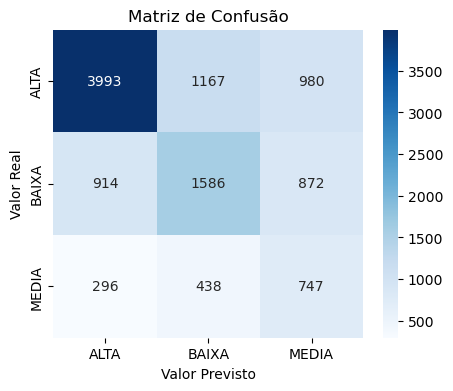

In [27]:
# Plotando a matriz de confusão como heatmap
labels = ['ALTA', 'BAIXA', 'MEDIA']
plot_confusion_matrix(y_test_tfidf, prediction, labels)